In [47]:
import numpy as np
import sklearn.manifold as man
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('playlist_songs.csv')
data = data.drop_duplicates()
X = data[['popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature']]

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [20]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate = 1e-3, init='random', perplexity=3).fit_transform(X)

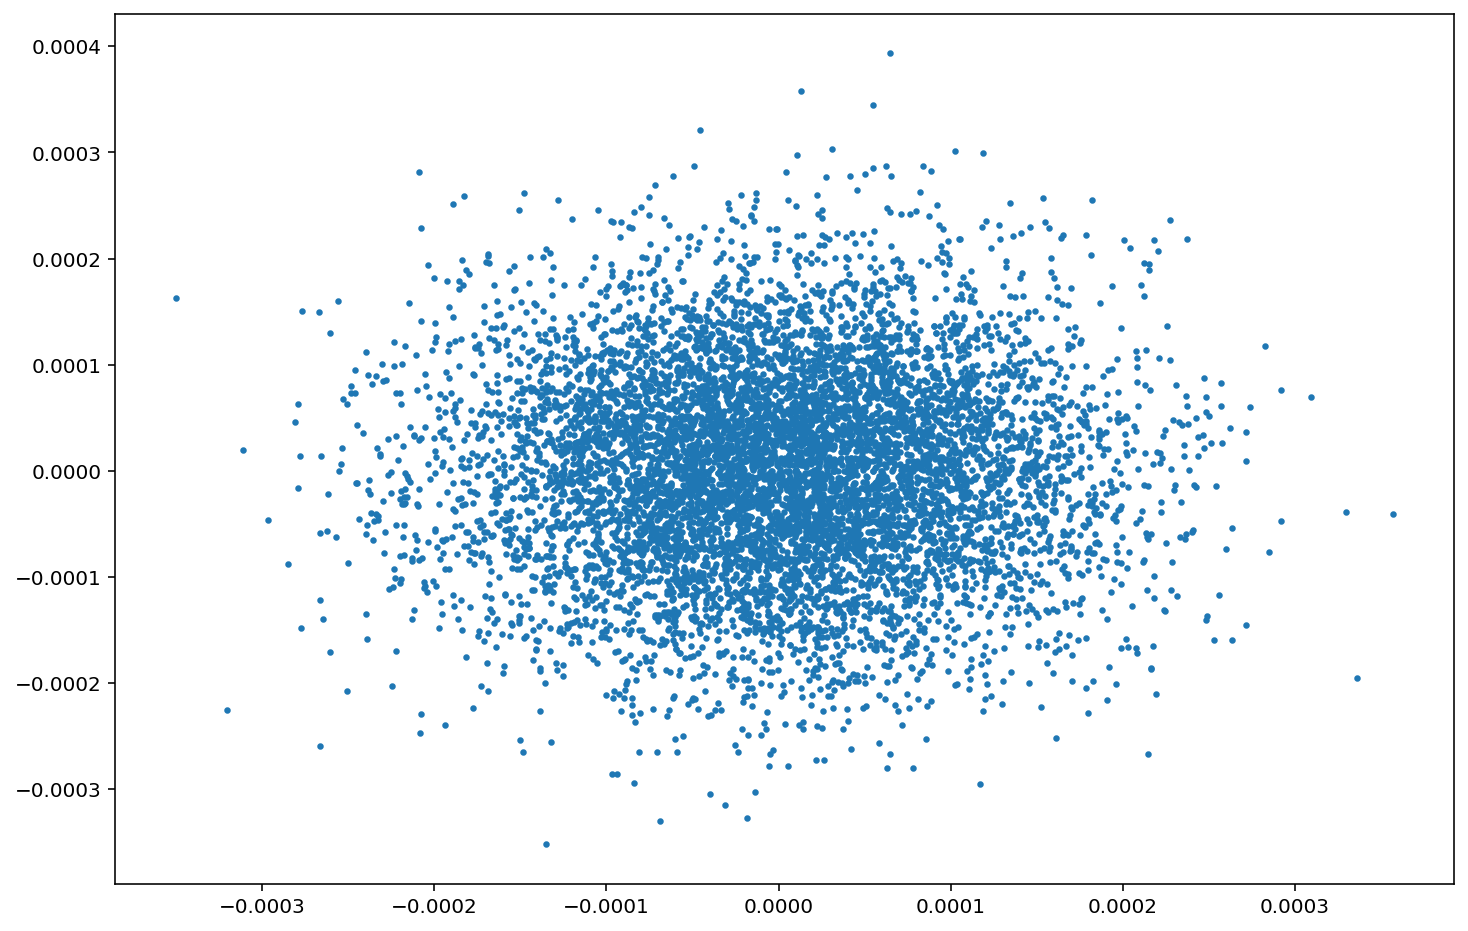

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(X_embedded[:,0],X_embedded[:,1], s = 5)
plt.show()

In [22]:
from sklearn.decomposition import PCA

pca_2 = PCA(n_components = 2)
pca_2.fit(X)
pcaX = pca_2.transform(X)

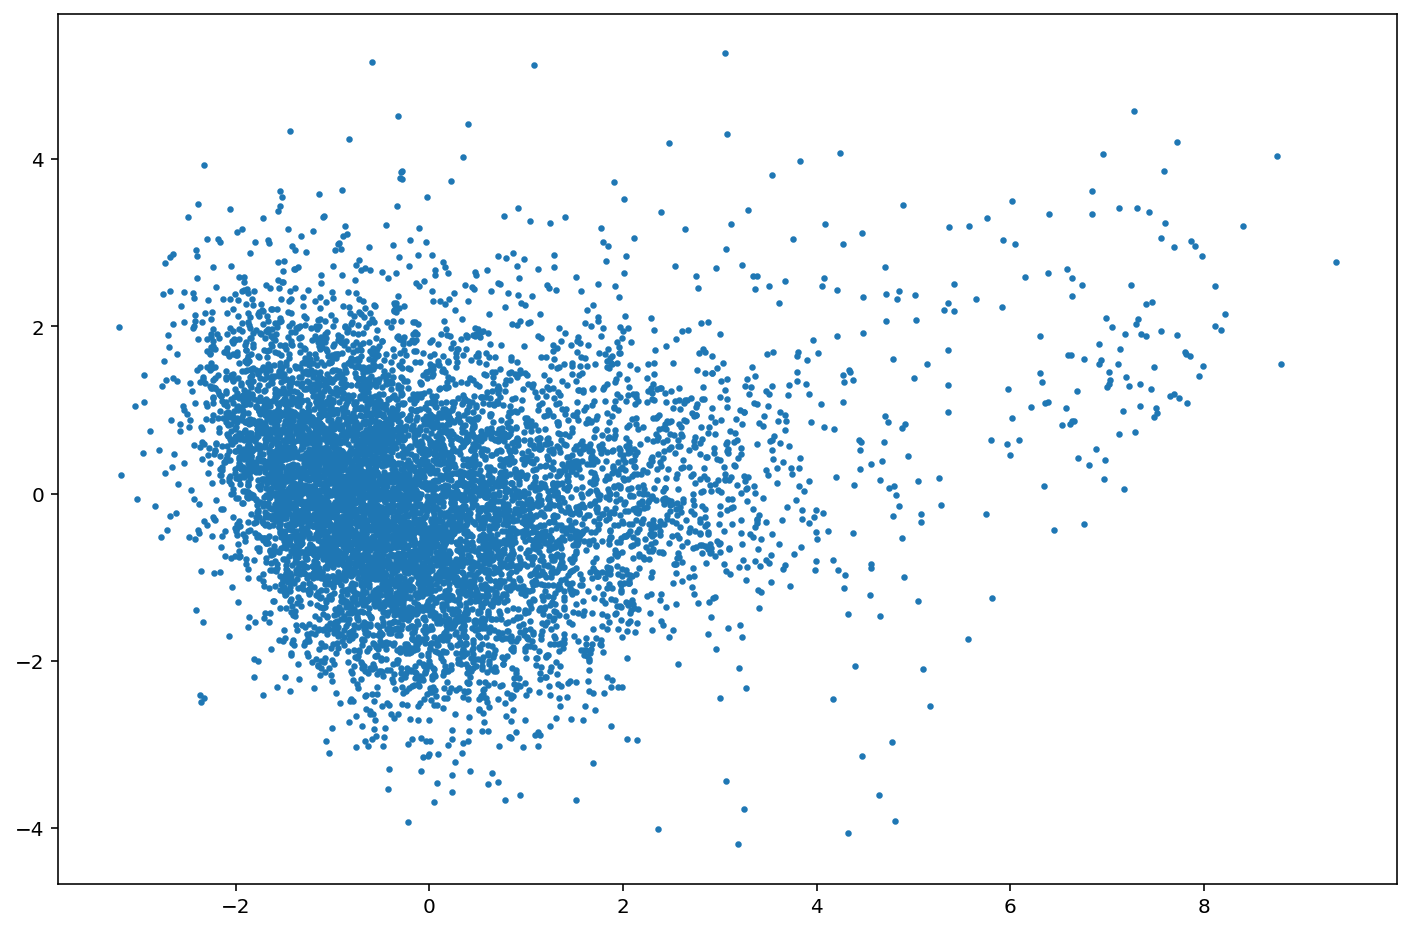

In [38]:
plt.figure(figsize=(12,8))
plt.scatter(pcaX[:,0],pcaX[:,1], s = 5)
plt.show()

In [24]:
import time
import os
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format ='retina'
import random
from functools import reduce
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import oauth2


cid = '98ecc26f9931438a852afca48a8a0196'
secret = 'db6462ad1fd4460cb70867c38347a045'
redirect_uri='http://localhost:7777/callback'
username = 'washingtondctrip'

scope = 'user-top-read playlist-modify-private playlist-modify-public'
token = util.prompt_for_user_token(username, scope, client_id=cid, client_secret=secret, redirect_uri=redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [25]:
def getTrackFeatures(track_id):
    features = sp.audio_features(track_id)

    acousticness = features[0]['acousticness']
    danceability = features[0]['danceability']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']

    track = [danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track


In [26]:
results = sp.current_user_top_tracks(limit=1000, offset=0,time_range='short_term')
track_id = []
track_name = []
artist = []
duration = []
album = []
popularity = []
danceability = []
acousticness = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
tempo = []
time_signature = []


for i, items in enumerate(results['items']):
    
        track_id.append(items['id'])
        track_name.append(items['name'])
        artist.append(items["artists"][0]["name"])
        duration.append(items["duration_ms"])
        album.append(items["album"]["name"])
        popularity.append(items["popularity"])
        
        items2 = getTrackFeatures(items['id'])
        danceability.append(items2[0])
        acousticness.append(items2[1])
        energy.append(items2[2])
        instrumentalness.append(items2[3])
        liveness.append(items2[4])
        loudness.append(items2[5])
        speechiness.append(items2[6])
        tempo.append(items2[7])
        time_signature.append(items2[8])

# Create the final df   
df_favourite = pd.DataFrame({ "track_name": track_name, 
                             "album": album, 
                             "track_id": track_id,
                             "artist": artist, 
                             "duration": duration, 
                             "popularity": popularity,
                             "danceability": danceability,
                             "acousticness":acousticness,
                             "energy":energy,
                             "instrumentalness":instrumentalness,
                             "liveness":liveness,
                             "loudness":loudness,
                             "speechiness":speechiness,
                             "tempo":tempo,
                             "time_signature":time_signature})

In [27]:
alltopdata =  df_favourite[['popularity', 'danceability', 'acousticness', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'time_signature']].astype('float32')

In [28]:
alltopdatacopy = scaler.transform(alltopdata)
alltoppca = pca_2.transform(alltopdatacopy)

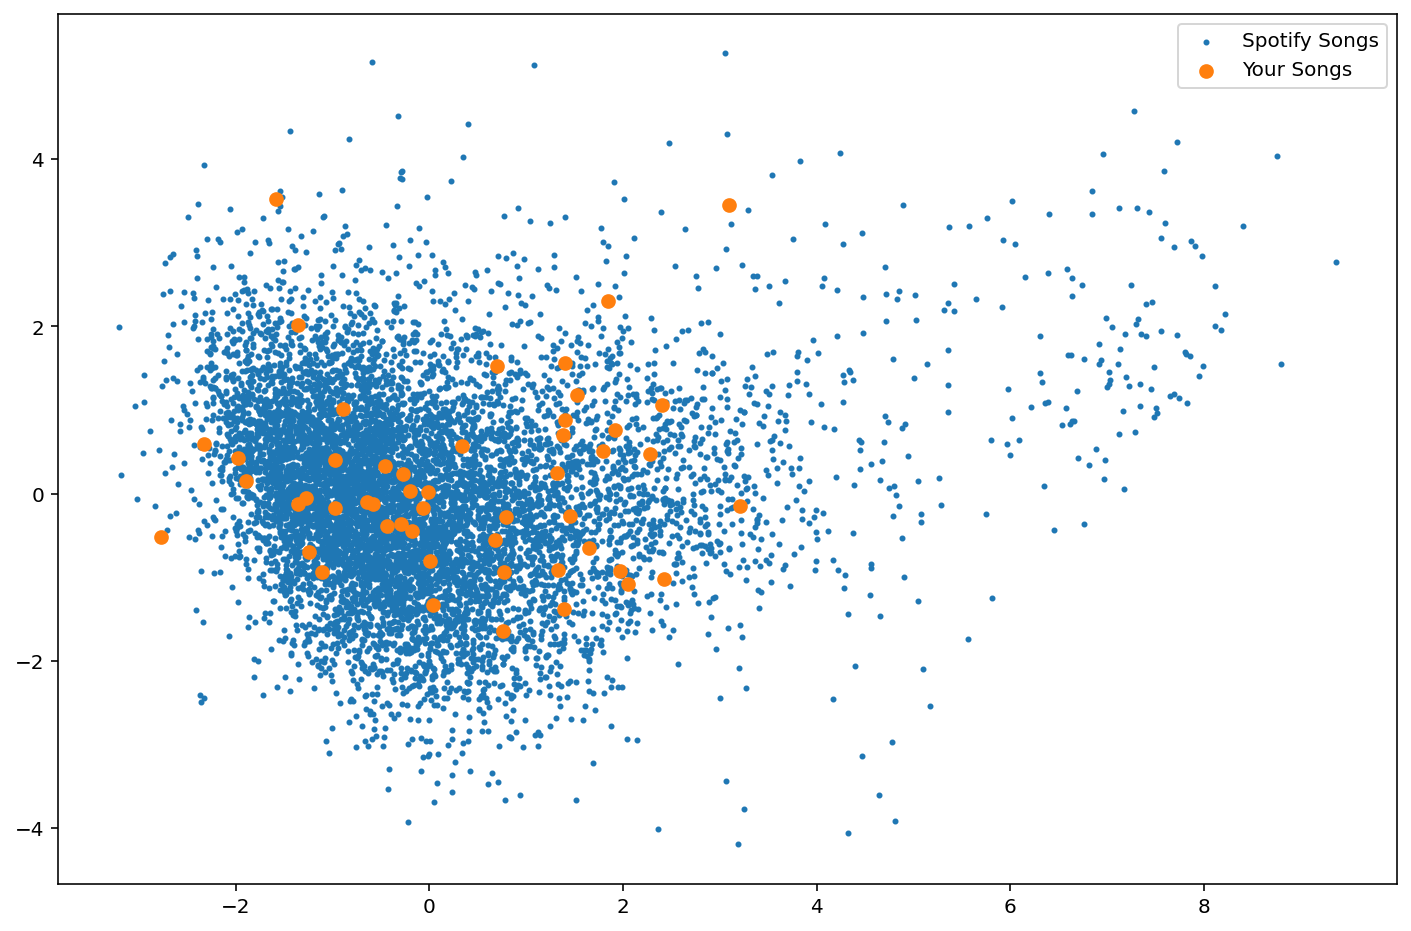

In [44]:
plt.figure(figsize=(12,8))
plt.scatter(pcaX[:,0],pcaX[:,1], s = 4)
plt.scatter(alltoppca[:,0],alltoppca[:,1], s = 40)
plt.legend(["Spotify Songs" , "Your Songs"])

plt.show()

In [30]:
data['pca0'] = pcaX[:, 0]
data['pca1'] = pcaX[:, 1]

df_favourite['pca0'] = alltoppca[:, 0]
df_favourite['pca1'] = alltoppca[:, 1]

In [138]:
def findclosest(title, bigdata, topdata, n):
    titles = []
    
    x = topdata[topdata['track_name'] == title]['pca0'].iloc[0]
    y = topdata[topdata['track_name'] == title]['pca1'].iloc[0]
    
    for index, row in bigdata.iterrows():
        px = row['pca0']
        py = row['pca1']
        dist = (x - px)**2 + (y - py)**2
        
        if dist > 0.00001:
            titles.append([dist, row['name'], row['artist']])
    
    titles.sort()
    return np.array(titles[:n])

In [139]:
findclosest('VIRILE', data, df_favourite, 10)

array([['0.0008773247252438414', 'Missing You', 'Lauren Weintraub'],
       ['0.0009499892107746306',
        'Kill Or Be Killed - Felsmann + Tiley Reinterpretation', 'Muse'],
       ['0.001249783958219128', 'Aeroplane', 'Leon of Athens'],
       ['0.0013866192123960766', 'The Night They Drove Old Dixie Down',
        'The Band'],
       ['0.0019642749858932553', "Fire - M&F's in Session Edit",
        'Matrix & Futurebound'],
       ['0.0033782303895161566', 'Western Tears', 'Jarrod Morris'],
       ['0.005509991809033342', 'Beyond the Sea', 'Bobby Darin'],
       ['0.007514955225874406', 'Pass The Peas', 'Various Artists'],
       ['0.008361585875593646', 'Sea To Sky - Parra For Cuva Remix',
        'Emancipator'],
       ['0.008384436114978522', 'I Guess I Just Feel Like', 'John Mayer']],
      dtype='<U53')

In [140]:
df_favourite['Closest 5'] = df_favourite['track_name'].apply(lambda x: findclosest(x, data, df_favourite, 5))

In [141]:
def makearraypretty(arr, n):
    return arr[n][1] + " by " + arr[n][2]
        

In [142]:
df_favourite['1st Closest'] = df_favourite['Closest 5'].apply(lambda x: makearraypretty(x, 0))

In [143]:
df_favourite['1st Closest'] = df_favourite['Closest 5'].apply(lambda x: makearraypretty(x, 0))
df_favourite['2nd Closest'] = df_favourite['Closest 5'].apply(lambda x: makearraypretty(x, 1))
df_favourite['3rd Closest'] = df_favourite['Closest 5'].apply(lambda x: makearraypretty(x, 2))
df_favourite['4th Closest'] = df_favourite['Closest 5'].apply(lambda x: makearraypretty(x, 3))
df_favourite['5th Closest'] = df_favourite['Closest 5'].apply(lambda x: makearraypretty(x, 4))

In [144]:
import plotly.express as px
fig = px.scatter(df_favourite, x="pca0", y="pca1",
                 size='popularity', hover_data=['track_name','artist','1st Closest', '2nd Closest', '3rd Closest', '4th Closest', '5th Closest'])
fig.show()